# Primer implementacion de modelo:

## Similitud Coseno:

Con el objetivo de en base a los parametros de entrada encontrar los 10 business id mas parecidos en cuanto a caracteristicas y ofrecer una idea del volumen de estrellas a recibir por la idea de negocio

### Import libraries:

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

### Opening principal dataframe:

### Importo dataset:

In [2]:
Datasets_ML_df_ML_promedios_Final = pd.read_parquet('../../../ML_datasets/Datasets_ML_df_ML_promedios_Final.parquet')

### Explorando el dataset:

In [3]:
Datasets_ML_df_ML_promedios_Final.describe(include = 'all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
count,49334,49334,49334,49334,49334,49334,49334.000000,49334.000000,49334.000000,49334.000000,...,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000
unique,49334,33625,41838,902,19,1985,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MTSW4McQd7CbVtyjqoe9mw,McDonald's,,Philadelphia,PA,19107,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,620,206,5269,11023,583,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,36.835069,-88.107477,3.576043,95.091296,...,0.753497,0.159383,0.005959,0.728524,0.169579,0.005817,0.594357,0.184498,0.002878,44.930713
std,NaN,NaN,NaN,NaN,NaN,NaN,5.942042,13.956064,0.820654,194.142791,...,0.430979,0.366037,0.076967,0.444726,0.375266,0.076051,0.491021,0.387893,0.053573,44.845631
min,NaN,NaN,NaN,NaN,NaN,NaN,27.564457,-120.083748,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-164.500000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.179064,-90.252828,3.000000,17.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.813604,-86.064464,3.500000,40.500000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,57.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,39.955350,-75.373785,4.000000,99.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,73.500000


<Axes: >

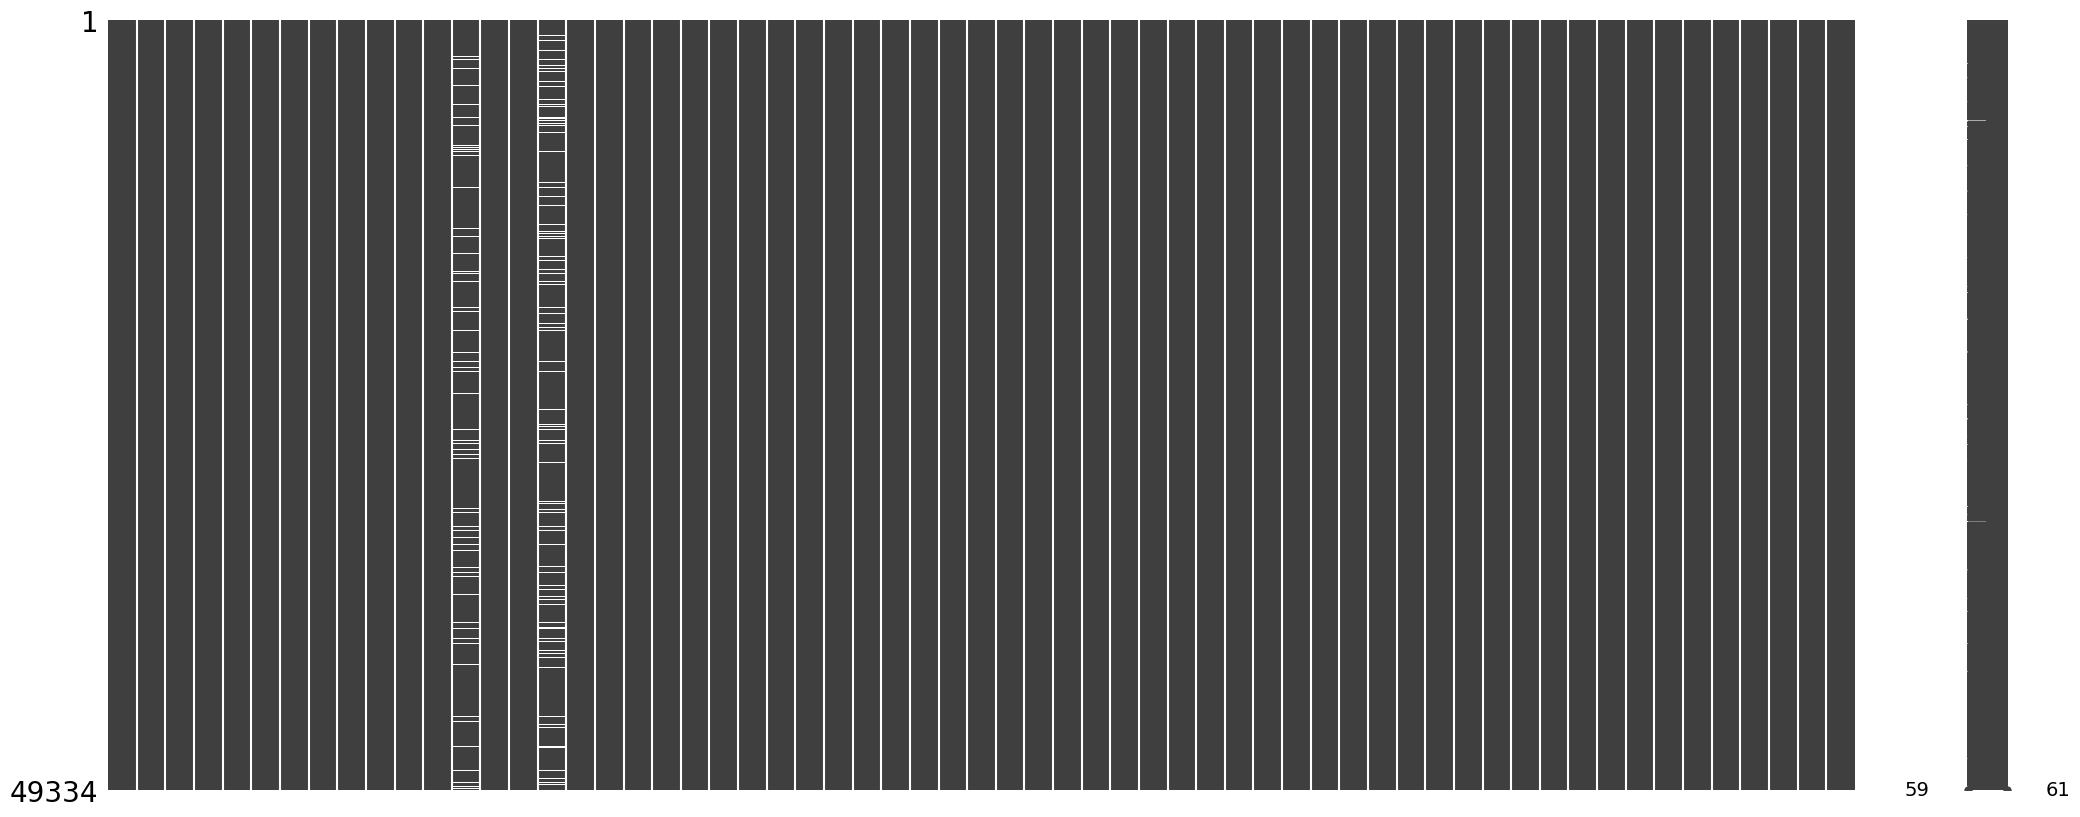

In [4]:
msno.matrix(Datasets_ML_df_ML_promedios_Final)

In [5]:
# sns.pairplot(Datasets_ML_df_ML_promedios_Final)

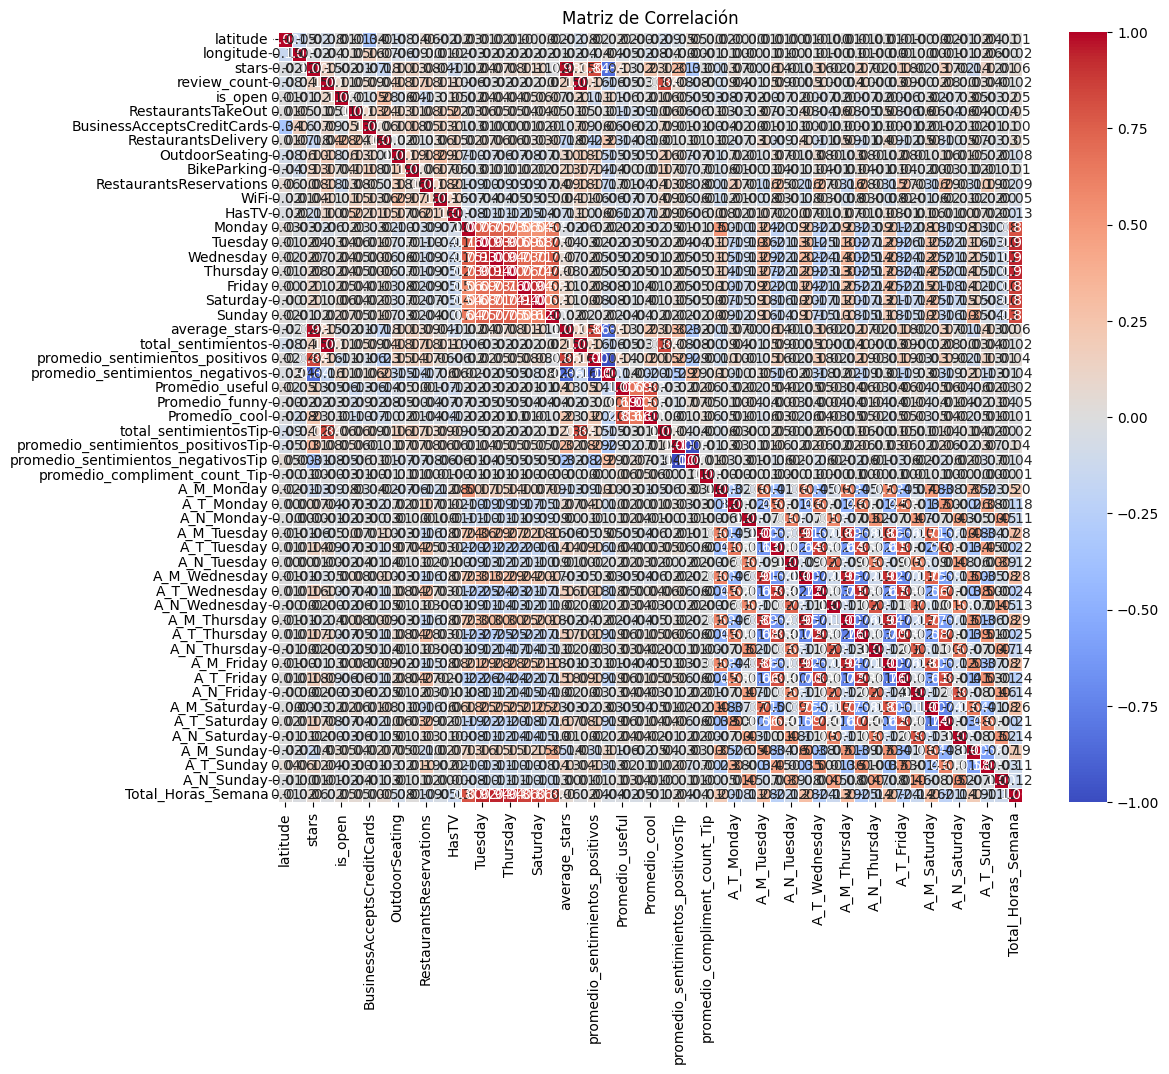

In [6]:
# Selecciona solo las columnas numéricas
columnas_numericas = Datasets_ML_df_ML_promedios_Final.select_dtypes(include=['number'])

# Calcula la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [7]:
Datasets_ML_df_ML_promedios_Final.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,1,0,0,1,0,0,1,0,0,94.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,0,1,0,0,1,0,0,1,0,40.0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,...,1,0,0,1,0,0,1,0,0,66.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,1.5,10,...,1,0,0,1,0,0,1,0,0,76.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.456320,4.0,10,...,1,0,0,0,0,0,0,1,0,23.0


In [8]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Selecciona solo las columnas numéricas
# columnas_numericas = Datasets_ML_df_ML_promedios_Final.select_dtypes(include='number')

# # Calcula la similitud del coseno entre las filas
# similitud_coseno = cosine_similarity(columnas_numericas)

# # Convierte la matriz de similitud en un DataFrame para visualización
# similitud_coseno_df = pd.DataFrame(similitud_coseno, columns=Datasets_ML_df_ML_promedios_Final.index, index=Datasets_ML_df_ML_promedios_Final.index)

# # Grafica el mapa de calor de la similitud del coseno
# plt.figure(figsize=(12, 10))
# sns.heatmap(similitud_coseno_df, annot=False, cmap='coolwarm')
# plt.title('Similitud del Coseno entre Filas')
# plt.show()


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Seleccionar un restaurante aleatorio del conjunto de datos
restaurante_aleatorio = Datasets_ML_df_ML_promedios_Final.sample(random_state=42)

# Seleccionar solo las columnas numéricas relevantes para el cálculo de similitud
columnas_numericas_relevantes = restaurante_aleatorio.select_dtypes(include='number').values

# Calcular la similitud del coseno con respecto a todos los restaurantes
similitud_coseno = cosine_similarity(columnas_numericas_relevantes, Datasets_ML_df_ML_promedios_Final.select_dtypes(include='number').fillna(0))

# Obtener los índices de los restaurantes más similares
indices_similares = np.argsort(similitud_coseno[0])[::-1][1:]  # Excluimos el restaurante aleatorio (índice 0)

# Mostrar el restaurante aleatorio y sus restaurantes más similares
print("Restaurante Aleatorio:")
print(restaurante_aleatorio)
print("\nRestaurantes Más Similares:")
print(Datasets_ML_df_ML_promedios_Final.iloc[indices_similares])



Restaurante Aleatorio:
                  business_id           name        address          city  \
14851  WzbFs7Iv2E55nZcXYp-QCw  Pats Pizzeria  104 N Main St  Mullica Hill   

      state postal_code   latitude  longitude  stars  review_count  ...  \
14851    PA       08062  39.743891 -75.224023    2.5            21  ...   

       A_M_Friday  A_T_Friday A_N_Friday  A_M_Saturday  A_T_Saturday  \
14851           1           0          0             1             0   

      A_N_Saturday  A_M_Sunday  A_T_Sunday  A_N_Sunday  Total_Horas_Semana  
14851            0           1           0           0                65.0  

[1 rows x 61 columns]

Restaurantes Más Similares:
                  business_id                               name  \
14851  WzbFs7Iv2E55nZcXYp-QCw                      Pats Pizzeria   
41049  oLi0Av7zJycNUVfXTRe8NQ                       Gigi & Big R   
23075  XkUuNjNngK3zSNFC8Aqu9Q                      Crisp Kitchen   
28899  s8P133LRpPSuypuVCwUzEA                   

In [26]:
# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares
restaurantes_similares = Datasets_ML_df_ML_promedios_Final.iloc[indices_10_similares]

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Restaurantes Más Similares (Top 10):")
print(restaurantes_similares)


Restaurantes Más Similares (Top 10):
                  business_id                                  name  \
41049  oLi0Av7zJycNUVfXTRe8NQ                          Gigi & Big R   
23075  XkUuNjNngK3zSNFC8Aqu9Q                         Crisp Kitchen   
28899  s8P133LRpPSuypuVCwUzEA                      The Crab Shack 2   
38655  hvPC2r3ClkJRSUtm_zFjIQ                          Frutta Bowls   
29147  IqaoL-982Ts8b3ztE4r9Jw                            Saladworks   
48820  pyM8MRVXKDRyhM7tu-3P1A                                   KFC   
5202   qtNCq2sRvDFHZK9V8kKYoQ                            Master Wok   
37217  LzWvZFkxO-9tHfV0kX1EFQ                          Read and Eat   
4460   ACDJiC4tPkWfiQyigWrEMA  Jerry's Rotisserie and Fried Chicken   
31013  _G5mTX8oUmoigO9JQhvYWA     Goodfella's New York Italian Deli   

                                           address          city state  \
41049                           5943 Haverford Ave  Philadelphia    LA   
23075  1041 Route 73 N, Ste A, Th

In [24]:
restaurantes_similares.head(11)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
41049,oLi0Av7zJycNUVfXTRe8NQ,Gigi & Big R,5943 Haverford Ave,Philadelphia,LA,19151,39.969857,-75.238722,3.0,22,...,1,0,0,1,0,0,1,0,0,63.0
23075,XkUuNjNngK3zSNFC8Aqu9Q,Crisp Kitchen,"1041 Route 73 N, Ste A, The View at Marlton",Marlton,FL,08053,39.910604,-74.941653,3.0,21,...,1,0,0,1,0,0,1,0,0,64.5
28899,s8P133LRpPSuypuVCwUzEA,The Crab Shack 2,5305 Rising Sun Ave,Philadelphia,TN,19120,40.030205,-75.117914,3.5,20,...,1,0,0,1,0,0,1,0,0,63.0
38655,hvPC2r3ClkJRSUtm_zFjIQ,Frutta Bowls,127-I Us-130,Cinnaminson,IN,08077,39.989284,-75.009136,3.0,21,...,1,0,0,1,0,0,1,0,0,63.0
29147,IqaoL-982Ts8b3ztE4r9Jw,Saladworks,444 Hurffville Crosskeys Rd,Sewell,AB,08080,39.734394,-75.067833,3.0,19,...,1,0,0,1,0,0,1,0,0,64.0
48820,pyM8MRVXKDRyhM7tu-3P1A,KFC,411 W Oregon Ave,Philadelphia,NV,19148,39.915113,-75.155852,2.0,21,...,1,0,0,1,0,0,1,0,0,66.5
5202,qtNCq2sRvDFHZK9V8kKYoQ,Master Wok,"1625 Chestnut St, Ste F11",Philadelphia,FL,19103,39.952355,-75.168057,3.0,22,...,1,0,0,1,0,0,1,0,0,63.0
37217,LzWvZFkxO-9tHfV0kX1EFQ,Read and Eat,6156 Ridge Ave,Philadelphia,FL,19128,40.034642,-75.216654,3.0,19,...,1,0,0,1,0,0,1,0,0,63.0
4460,ACDJiC4tPkWfiQyigWrEMA,Jerry's Rotisserie and Fried Chicken,233 W Schuylkill Rd,Pottstown,CA,19465,40.233787,-75.657975,4.0,20,...,1,0,0,1,0,0,1,0,0,63.0
31013,_G5mTX8oUmoigO9JQhvYWA,Goodfella's New York Italian Deli,408 Delsea Dr N,Glassboro,IN,08028,39.712443,-75.110970,4.5,21,...,1,0,0,1,0,0,1,0,0,64.5


In [17]:
restaurante_aleatorio.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
14851,WzbFs7Iv2E55nZcXYp-QCw,Pats Pizzeria,104 N Main St,Mullica Hill,PA,08062,39.743891,-75.224023,2.5,21,...,1,0,0,1,0,0,1,0,0,65.0


In [27]:
import pandas as pd

# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares
restaurantes_similares = Datasets_ML_df_ML_promedios_Final.iloc[indices_10_similares].reset_index(drop=True)

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Restaurantes Más Similares (Top 10):")
print(restaurantes_similares)


Restaurantes Más Similares (Top 10):
              business_id                                  name  \
0  oLi0Av7zJycNUVfXTRe8NQ                          Gigi & Big R   
1  XkUuNjNngK3zSNFC8Aqu9Q                         Crisp Kitchen   
2  s8P133LRpPSuypuVCwUzEA                      The Crab Shack 2   
3  hvPC2r3ClkJRSUtm_zFjIQ                          Frutta Bowls   
4  IqaoL-982Ts8b3ztE4r9Jw                            Saladworks   
5  pyM8MRVXKDRyhM7tu-3P1A                                   KFC   
6  qtNCq2sRvDFHZK9V8kKYoQ                            Master Wok   
7  LzWvZFkxO-9tHfV0kX1EFQ                          Read and Eat   
8  ACDJiC4tPkWfiQyigWrEMA  Jerry's Rotisserie and Fried Chicken   
9  _G5mTX8oUmoigO9JQhvYWA     Goodfella's New York Italian Deli   

                                       address          city state  \
0                           5943 Haverford Ave  Philadelphia    LA   
1  1041 Route 73 N, Ste A, The View at Marlton       Marlton    FL   
2              

In [28]:
restaurantes_similares

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
0,oLi0Av7zJycNUVfXTRe8NQ,Gigi & Big R,5943 Haverford Ave,Philadelphia,LA,19151,39.969857,-75.238722,3.0,22,...,1,0,0,1,0,0,1,0,0,63.0
1,XkUuNjNngK3zSNFC8Aqu9Q,Crisp Kitchen,"1041 Route 73 N, Ste A, The View at Marlton",Marlton,FL,08053,39.910604,-74.941653,3.0,21,...,1,0,0,1,0,0,1,0,0,64.5
2,s8P133LRpPSuypuVCwUzEA,The Crab Shack 2,5305 Rising Sun Ave,Philadelphia,TN,19120,40.030205,-75.117914,3.5,20,...,1,0,0,1,0,0,1,0,0,63.0
3,hvPC2r3ClkJRSUtm_zFjIQ,Frutta Bowls,127-I Us-130,Cinnaminson,IN,08077,39.989284,-75.009136,3.0,21,...,1,0,0,1,0,0,1,0,0,63.0
4,IqaoL-982Ts8b3ztE4r9Jw,Saladworks,444 Hurffville Crosskeys Rd,Sewell,AB,08080,39.734394,-75.067833,3.0,19,...,1,0,0,1,0,0,1,0,0,64.0
5,pyM8MRVXKDRyhM7tu-3P1A,KFC,411 W Oregon Ave,Philadelphia,NV,19148,39.915113,-75.155852,2.0,21,...,1,0,0,1,0,0,1,0,0,66.5
6,qtNCq2sRvDFHZK9V8kKYoQ,Master Wok,"1625 Chestnut St, Ste F11",Philadelphia,FL,19103,39.952355,-75.168057,3.0,22,...,1,0,0,1,0,0,1,0,0,63.0
7,LzWvZFkxO-9tHfV0kX1EFQ,Read and Eat,6156 Ridge Ave,Philadelphia,FL,19128,40.034642,-75.216654,3.0,19,...,1,0,0,1,0,0,1,0,0,63.0
8,ACDJiC4tPkWfiQyigWrEMA,Jerry's Rotisserie and Fried Chicken,233 W Schuylkill Rd,Pottstown,CA,19465,40.233787,-75.657975,4.0,20,...,1,0,0,1,0,0,1,0,0,63.0
9,_G5mTX8oUmoigO9JQhvYWA,Goodfella's New York Italian Deli,408 Delsea Dr N,Glassboro,IN,08028,39.712443,-75.110970,4.5,21,...,1,0,0,1,0,0,1,0,0,64.5


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Crear un diccionario con valores ficticios para simular un nuevo negocio
nuevo_negocio = {
    'latitude': 40.0,
    'longitude': -75.0,
    'stars': 4.5,
    'review_count': 50,
    'is_open': 1,
    'RestaurantsTakeOut': 1,
    'BusinessAcceptsCreditCards': 1,
    'RestaurantsDelivery': 1,
    'RestaurantsPriceRange2': 2,
    'OutdoorSeating': 1,
    'BikeParking': 1,
    'RestaurantsReservations': 1,
    'WiFi': 1,
    'HasTV': 1,
    # ... incluir otras características relevantes ...
}

# Convertir el diccionario a un DataFrame
df_nuevo_negocio = pd.DataFrame([nuevo_negocio])

# Cargar el DataFrame con los datos de los negocios existentes (Datasets_ML_df_ML_promedios_Final)
# Asegúrate de tener cargado previamente el DataFrame con los datos existentes
# Datasets_ML_df_ML_promedios_Final = ...

# Seleccionar solo las columnas presentes tanto en el nuevo negocio como en los existentes
columnas_comunes = df_nuevo_negocio.columns.intersection(Datasets_ML_df_ML_promedios_Final.select_dtypes(include='number').columns)

# Filtrar el DataFrame del nuevo negocio y de los existentes
df_nuevo_negocio_filtrado = df_nuevo_negocio[columnas_comunes]
df_existente_filtrado = Datasets_ML_df_ML_promedios_Final[columnas_comunes]

# Calcular la similitud del coseno con respecto a todos los restaurantes
similitud_coseno_nuevo = cosine_similarity(df_nuevo_negocio_filtrado.values, df_existente_filtrado.fillna(0).values)

# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares_nuevo = np.argsort(similitud_coseno_nuevo[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares al negocio ficticio
restaurantes_similares_nuevo = Datasets_ML_df_ML_promedios_Final.iloc[indices_10_similares_nuevo].reset_index(drop=True)

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Negocio Ficticio:")
print(df_nuevo_negocio_filtrado)
print("\nRestaurantes Más Similares al Negocio Ficticio (Top 10):")
print(restaurantes_similares_nuevo)


Negocio Ficticio:
   latitude  longitude  stars  review_count  is_open  RestaurantsTakeOut  \
0      40.0      -75.0    4.5            50        1                   1   

   BusinessAcceptsCreditCards  RestaurantsDelivery  OutdoorSeating  \
0                           1                    1               1   

   BikeParking  RestaurantsReservations  WiFi  HasTV  
0            1                        1     1      1  

Restaurantes Más Similares al Negocio Ficticio (Top 10):
              business_id                           name  \
0  ntsN09UfQSlRWO37guMKMw               Riviera D'Italia   
1  gtlj72UOq-wOSuOfXOCWeg                Johnny Longhots   
2  7CWiFnqHCz5dP1OMixUuDA  Boyd's Cardinal Hollow Winery   
3  WVokxjYmNVU-AsFNV3loPw                     Ryan's Pub   
4  BtxUZn4d7yxsHwdlRq1dkw            Mount Airy Tap Room   
5  wnucEo99Xv80lLKLybkq3w     The Oaks Family Restaurant   
6  lbbkBktYRTfOXIm37zKdeg                  El Cuscatleco   
7  sS-8DvNTZJrMZgLib-Eq0A               

### Le agregaria tematicas, mexican food por ejemplo, mas columnas de clasificacion